<a href="https://colab.research.google.com/github/anezovic1/credit-score-classification/blob/main/Projektni_zadatak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mašinsko učenje 2023/24

## Projektni zadatak

# Zadatak 1

Globalni dio

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/MU Projekat/dataset/creditscore_dataset.csv')

<ipython-input-3-7378dbaa747f>:1: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/MU Projekat/dataset/creditscore_dataset.csv')


## 1.1 Analiza seta podataka

**Provjera dimenzija datog skupa podataka**

In [ ]:
# prvi način
data.shape

(100022, 30)

In [ ]:
# drugi način
print('Broj redova je: ', len(data.index))
print('Broj kolona je: ', len(data.columns))

Broj redova je:  100022
Broj kolona je:  30


**Prikaz osnovnih informacija o skupu podataka**

In [ ]:
# uvid u tipove podataka koji su prisutni u skupu podataka
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100022 entries, 0 to 100021
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0.2              100022 non-null  int64  
 1   Unnamed: 0                100022 non-null  int64  
 2   Unnamed: 0.1              100022 non-null  int64  
 3   ID                        100022 non-null  object 
 4   Customer_ID               100022 non-null  object 
 5   Month                     100022 non-null  object 
 6   Name_and_Age              90034 non-null   object 
 7   SSN                       100022 non-null  object 
 8   Occupation                100022 non-null  object 
 9   Annual_Income             100022 non-null  object 
 10  Monthly_Inhand_Salary     85013 non-null   float64
 11  Num_Bank_Accounts         100022 non-null  object 
 12  Num_Credit_Card           100022 non-null  object 
 13  Interest_Rate             100022 non-null  i

**Iako je tipove kolona moguće vidjeti iz prethodnog poziva, drugi način provjere tipova jeste sljedeći.**

In [ ]:
data.dtypes

Unnamed: 0.2                  int64
Unnamed: 0                    int64
Unnamed: 0.1                  int64
ID                           object
Customer_ID                  object
Month                        object
Name_and_Age                 object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts            object
Num_Credit_Card              object
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour           

**Pregled samo nekih vrijednosti**

In [ ]:
data['Name_and_Age'][0]

'Aaron Maashoh,23'

In [ ]:
data['Occupation'][200]

'Entrepreneur'

In [ ]:
data['Type_of_Loan'][5000]

'Personal Loan, Student Loan, Debt Consolidation Loan, Credit-Builder Loan, Mortgage Loan, Not Specified, and Debt Consolidation Loan'

In [ ]:
data['Num_Credit_Inquiries']

0         4.0
1         4.0
2         4.0
3         4.0
4         4.0
         ... 
100017    3.0
100018    3.0
100019    3.0
100020    3.0
100021    3.0
Name: Num_Credit_Inquiries, Length: 100022, dtype: float64

**Izdvajanje samo numeričkih kolona**

In [ ]:
numericki_tipovi = ['float64', 'int64']
data_numericki = data.select_dtypes(include=numericki_tipovi)
data_numericki.dtypes

Unnamed: 0.2                  int64
Unnamed: 0                    int64
Unnamed: 0.1                  int64
Monthly_Inhand_Salary       float64
Interest_Rate                 int64
Delay_from_due_date           int64
Num_Credit_Inquiries        float64
Credit_Utilization_Ratio    float64
Total_EMI_per_month         float64
dtype: object

**Izdvajanje samo kategoričkih kolona**

In [ ]:
kategoricki_tipovi = ['object']
data_kategoricki = data.select_dtypes(include=kategoricki_tipovi)
data_kategoricki.dtypes

ID                         object
Customer_ID                object
Month                      object
Name_and_Age               object
SSN                        object
Occupation                 object
Annual_Income              object
Num_Bank_Accounts          object
Num_Credit_Card            object
Num_of_Loan                object
Type_of_Loan               object
Num_of_Delayed_Payment     object
Changed_Credit_Limit       object
Credit_Mix                 object
Outstanding_Debt           object
Credit_History_Age         object
Payment_of_Min_Amount      object
Amount_invested_monthly    object
Payment_Behaviour          object
Monthly_Balance            object
Credit_Score               object
dtype: object

**Broj numeričkih i kategoričkih kolona**

In [ ]:
print('Broj numeričkih kolona: ', len(data_numericki.columns))
print('Broj kategoričkih kolona: ', len(data_kategoricki.columns))

Broj numeričkih kolona:  9
Broj kategoričkih kolona:  21


**Deskriptivna statistika**

U nastavku se detaljnije obrađuje (Stavka 1.2).

In [ ]:
# za svaku numeričku kolonu
data.describe()

,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,Monthly_Inhand_Salary,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,100022.00000,100022.000000,100022.000000,85013.000000,100022.000000,100022.000000,98056.000000,100022.000000,100022.000000
mean,50010.50000,49998.855802,49998.855802,4193.959305,72.462958,21.069315,27.749776,32.284992,1403.551424
std,28874.00865,28867.943554,28867.943554,3183.654586,466.380239,14.860541,193.156901,5.116671,8308.208400
min,0.00000,0.000000,0.000000,303.645417,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,25005.25000,24998.250000,24998.250000,1625.558333,8.000000,10.000000,3.000000,28.052683,30.306660
50%,50010.50000,49999.500000,49999.500000,3093.153333,13.000000,18.000000,6.000000,32.305645,69.246684
75%,75015.75000,74999.750000,74999.750000,5957.448333,20.000000,28.000000,9.000000,36.496135,161.163199
max,100021.00000,99999.000000,99999.000000,15204.633330,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [ ]:
# za svaku kolonu (i numeričke i kategoričke)
data.describe(include='all')

,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,ID,Customer_ID,Month,Name_and_Age,SSN,Occupation,Annual_Income,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100022.00000,100022.000000,100022.000000,100022,100022,100022,90034,100022,100022,100022,...,100022,100022,100022.000000,90988,100022,100022.000000,95541,100022,98822,100022
unique,NaN,NaN,NaN,100000,12500,8,25520,12501,46,18940,...,4,13178,NaN,404,4,NaN,91049,7,98790,3
top,NaN,NaN,NaN,0x14c33,CUS_0x5313,April,"Stempelj,35",#F%$D@*&8,_______,17273.83,...,Standard,1360.45,NaN,15 Years and 11 Months,Yes,NaN,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
freq,NaN,NaN,NaN,2,9,12505,16,5576,7063,16,...,36489,24,NaN,447,37688,NaN,4305,25521,9,53182
mean,50010.50000,49998.855802,49998.855802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,32.284992,NaN,NaN,1403.551424,NaN,NaN,NaN,NaN
std,28874.00865,28867.943554,28867.943554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.116671,NaN,NaN,8308.208400,NaN,NaN,NaN,NaN
min,0.00000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,20.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,25005.25000,24998.250000,24998.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,28.052683,NaN,NaN,30.306660,NaN,NaN,NaN,NaN
50%,50010.50000,49999.500000,49999.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,32.305645,NaN,NaN,69.246684,NaN,NaN,NaN,NaN
75%,75015.75000,74999.750000,74999.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,36.496135,NaN,NaN,161.163199,NaN,NaN,NaN,NaN


**Prikaz nedostajućih vrijednosti**

In [ ]:
nedostajuce_vrijednosti = data.isna().sum()
print(nedostajuce_vrijednosti)

Unnamed: 0.2                    0
Unnamed: 0                      0
Unnamed: 0.1                    0
ID                              0
Customer_ID                     0
Month                           0
Name_and_Age                 9988
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15009
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                 7887
Delay_from_due_date             0
Num_of_Delayed_Payment       4552
Changed_Credit_Limit            0
Num_Credit_Inquiries         1966
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9034
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4481
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score  

**Prikaz jedinstvenih vrijednosti**

Potrebno je pokazati kako su podaci u jednoj koloni raznoliki odnosno postoje različite vrijednosti koje je potrebno srediti na neki način. Zaključak jeste taj da je bolje jedinstvene vrijednosti prikazati nakon transformacije podataka.



In [ ]:
data['Num_Credit_Card'].unique()

array(['4', '4 cards', '1385', ..., '955', '1430', '679'], dtype=object)

In [ ]:
data['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'True', 'Yes'], dtype=object)

In [ ]:
data['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

## 1.2 Analiza pojedinačnih varijabli

####Deskriptivna statistika numeričkih varijabli

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Unnamed: 0.2
Unnamed_02_varijabla = data['Unnamed: 0.2']

# Distribucija
distribucija_Unnamed_02 = Unnamed_02_varijabla.value_counts()

# Deskriptivna statistika
deskriptivna_statistika_Unnamed_02 = Unnamed_02_varijabla.describe()
print('Deskriptivna statistika')
print(deskriptivna_statistika_Unnamed_02)

Deskriptivna statistika
count    100022.00000
mean      50010.50000
std       28874.00865
min           0.00000
25%       25005.25000
50%       50010.50000
75%       75015.75000
max      100021.00000
Name: Unnamed: 0.2, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Unnamed: 0
Unnamed_0_varijabla = data['Unnamed: 0']

# Distribucija
distribucija_Unnamed_0 = Unnamed_0_varijabla.value_counts()

# Deskriptivna statistika
deskriptivna_statistika_Unnamed_0 = Unnamed_0_varijabla.describe()
print('Deskriptivna statistika')
print(deskriptivna_statistika_Unnamed_0)

Deskriptivna statistika
count    100022.000000
mean      49998.855802
std       28867.943554
min           0.000000
25%       24998.250000
50%       49999.500000
75%       74999.750000
max       99999.000000
Name: Unnamed: 0, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 3. Unnamed: 0.1
Unnamed_0_1_varijabla = data['Unnamed: 0.1']

# Distribucija
distribucija_Unnamed_0_1 = Unnamed_0_1_varijabla.value_counts()

# Deskriptivna statistika
deskriptivna_statistika_Unnamed_0_1 = Unnamed_0_1_varijabla.describe()
print('Deskriptivna statistika')
print(deskriptivna_statistika_Unnamed_0_1)

Deskriptivna statistika
count    100022.000000
mean      49998.855802
std       28867.943554
min           0.000000
25%       24998.250000
50%       49999.500000
75%       74999.750000
max       99999.000000
Name: Unnamed: 0.1, dtype: float64


In [ ]:
# 4. Monthly_Inhand_Salary
Monthly_Inhand_Salary_varijabla = data['Monthly_Inhand_Salary']

# Distribucija
distribucija_Monthly_Inhand_Salary = Monthly_Inhand_Salary_varijabla.value_counts()

# Deskriptivna statistika
deskriptivna_statistika_Monthly_Inhand_Salary = Monthly_Inhand_Salary_varijabla.describe()
print('Deskriptivna statistika')
print(deskriptivna_statistika_Monthly_Inhand_Salary)

Deskriptivna statistika
count    85013.000000
mean      4193.959305
std       3183.654586
min        303.645417
25%       1625.558333
50%       3093.153333
75%       5957.448333
max      15204.633330
Name: Monthly_Inhand_Salary, dtype: float64


In [ ]:
# 5. Interest_Rate
Interest_Rate_varijabla = data['Interest_Rate']

# Distribucija
distribucija_Interest_Rate = Interest_Rate_varijabla.value_counts()

# Deskriptivna statistika
deskriptivna_statistika_Interest_Rate = Interest_Rate_varijabla.describe()
print('Deskriptivna statistika')
print(deskriptivna_statistika_Interest_Rate)

Deskriptivna statistika
count    100022.000000
mean         72.462958
std         466.380239
min           1.000000
25%           8.000000
50%          13.000000
75%          20.000000
max        5797.000000
Name: Interest_Rate, dtype: float64


In [ ]:
# 6. Delay_from_due_date
Delay_from_due_date_varijabla = data['Delay_from_due_date']

# Distribucija
distribucija_Delay_from_due_date = Delay_from_due_date_varijabla.value_counts()

# Deskriptivna statistika
deskriptivna_statistika_Delay_from_due_date = Delay_from_due_date_varijabla.describe()
print('Deskriptivna statistika')
print(deskriptivna_statistika_Delay_from_due_date)

Deskriptivna statistika
count    100022.000000
mean         21.069315
std          14.860541
min          -5.000000
25%          10.000000
50%          18.000000
75%          28.000000
max          67.000000
Name: Delay_from_due_date, dtype: float64


In [ ]:
# 7. Num_Credit_Inquiries
Num_Credit_Inquiries_varijabla = data['Num_Credit_Inquiries']

# Distribucija
distribucija_Num_Credit_Inquiries = Num_Credit_Inquiries_varijabla.value_counts()

# Deskriptivna statistika
deskriptivna_statistika_Num_Credit_Inquiries = Num_Credit_Inquiries_varijabla.describe()
print('Deskriptivna statistika')
print(deskriptivna_statistika_Num_Credit_Inquiries)

Deskriptivna statistika
count    98056.000000
mean        27.749776
std        193.156901
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max       2597.000000
Name: Num_Credit_Inquiries, dtype: float64


In [ ]:
# 8. Credit_Utilization_Ratio
Credit_Utilization_Ratio_varijabla = data['Credit_Utilization_Ratio']

# Distribucija
distribucija_Credit_Utilization_Ratio  = Credit_Utilization_Ratio_varijabla.value_counts()

# Deskriptivna statistika
deskriptivna_statistika_Credit_Utilization_Ratio = Credit_Utilization_Ratio_varijabla.describe()
print('Deskriptivna statistika')
print(deskriptivna_statistika_Credit_Utilization_Ratio )


Deskriptivna statistika
count    100022.000000
mean         32.284992
std           5.116671
min          20.000000
25%          28.052683
50%          32.305645
75%          36.496135
max          50.000000
Name: Credit_Utilization_Ratio, dtype: float64


In [ ]:
# 9. Total_EMI_per_month
Total_EMI_per_month_varijabla = data['Total_EMI_per_month']

# Distribucija
distribucija_Total_EMI_per_month = Total_EMI_per_month_varijabla.value_counts()

# Deskriptivna statistika
deskriptivna_statistika_Total_EMI_per_month = Total_EMI_per_month_varijabla.describe()
print('Deskriptivna statistika')
print(deskriptivna_statistika_Total_EMI_per_month )

Deskriptivna statistika
count    100022.000000
mean       1403.551424
std        8308.208400
min           0.000000
25%          30.306660
50%          69.246684
75%         161.163199
max       82331.000000
Name: Total_EMI_per_month, dtype: float64


####Box-plotovi numeričkih varijabli

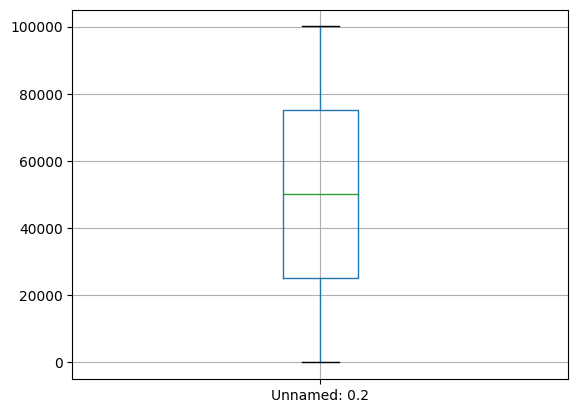

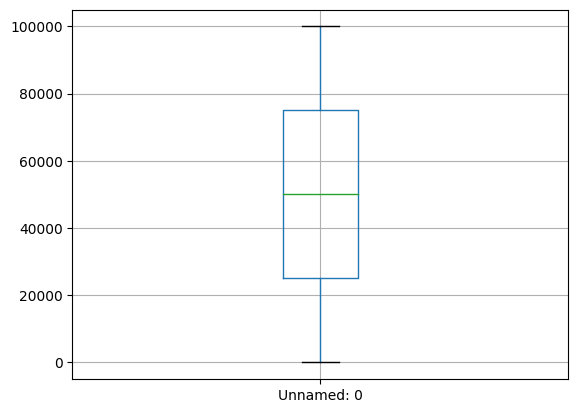

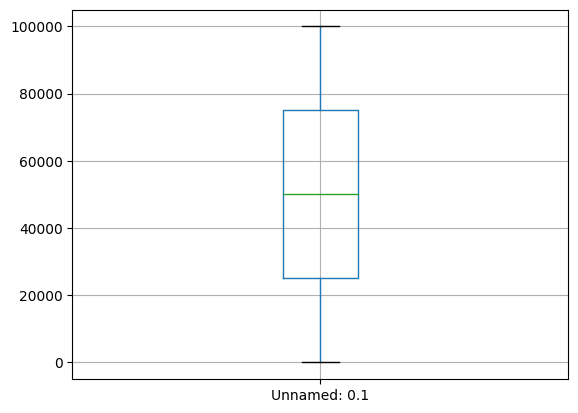

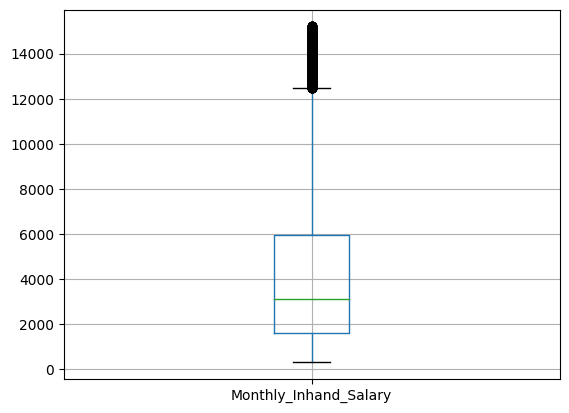

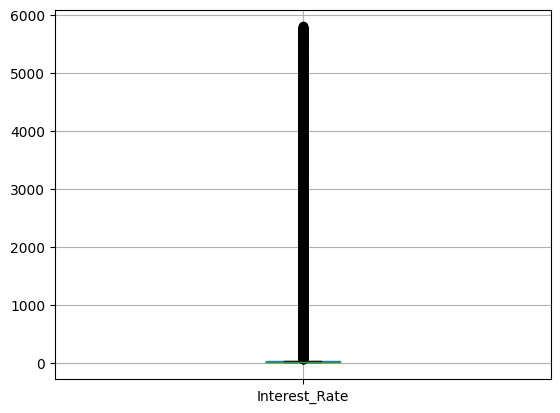

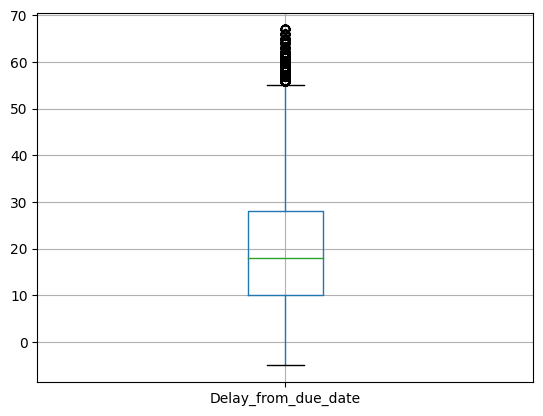

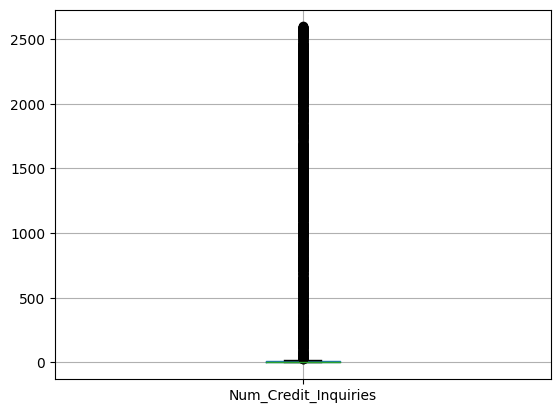

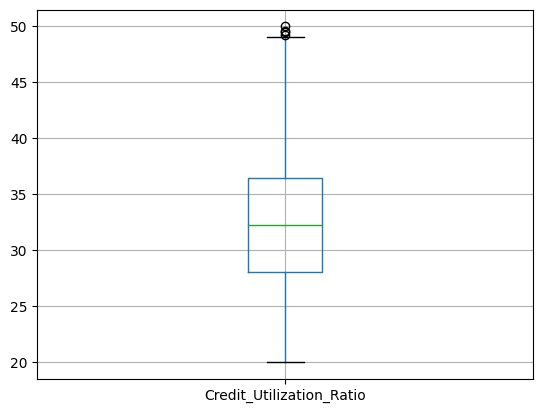

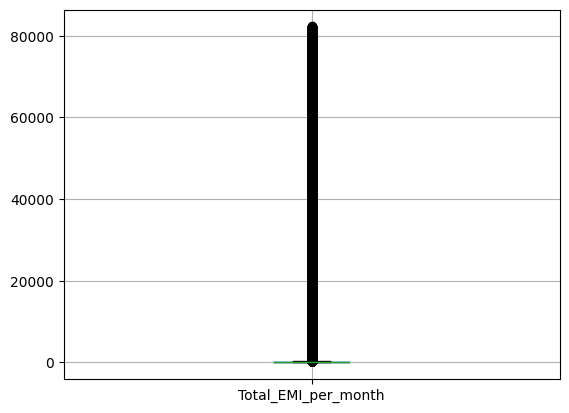

In [ ]:
import matplotlib.pyplot as plt
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numerics = data.select_dtypes(include=numerics)
for col in df_numerics:
    plt.figure()
    data.boxplot([col])

#### Histogram numeričkih varijabli

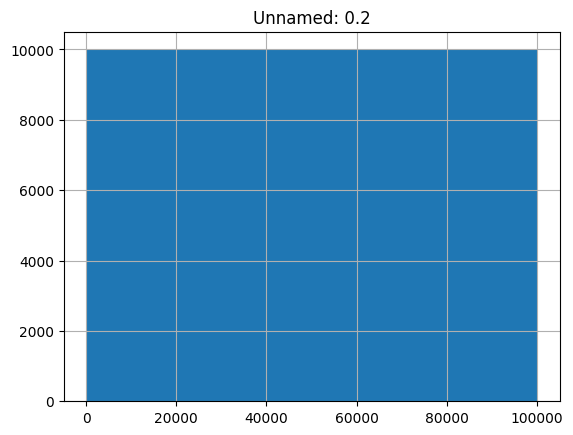

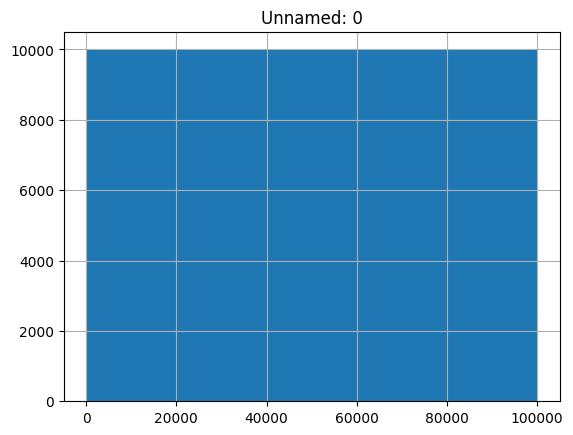

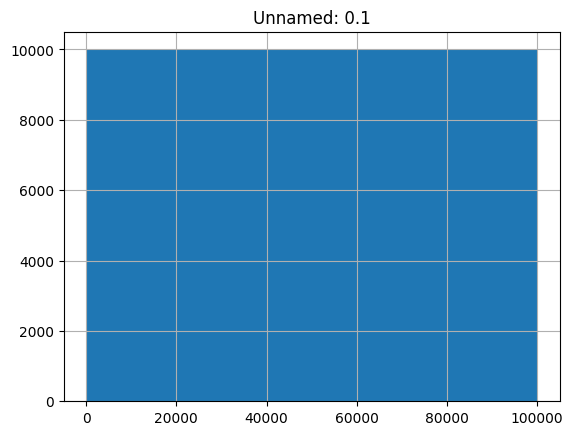

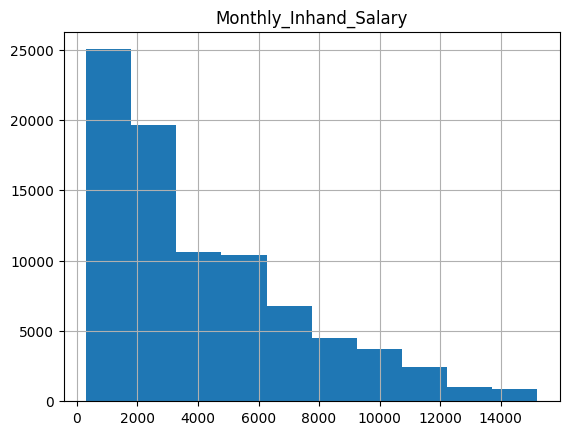

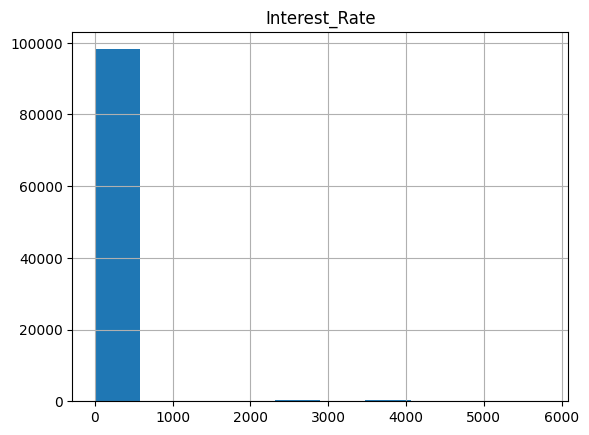

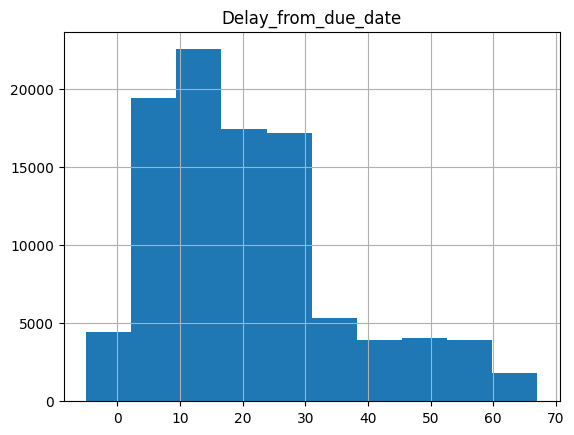

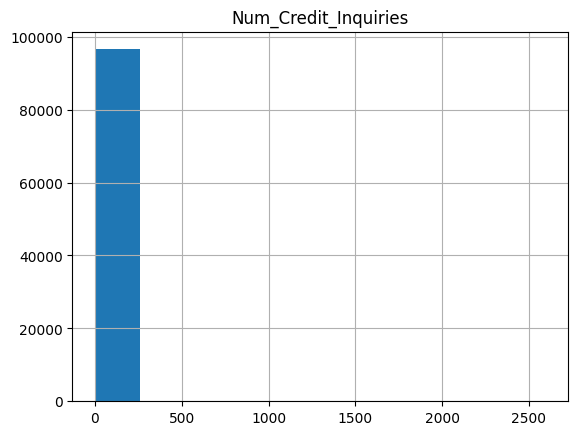

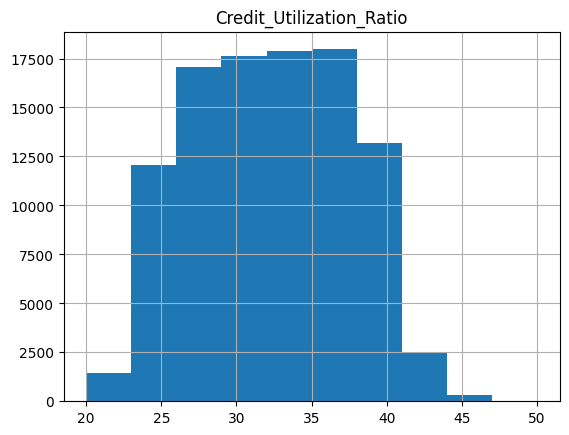

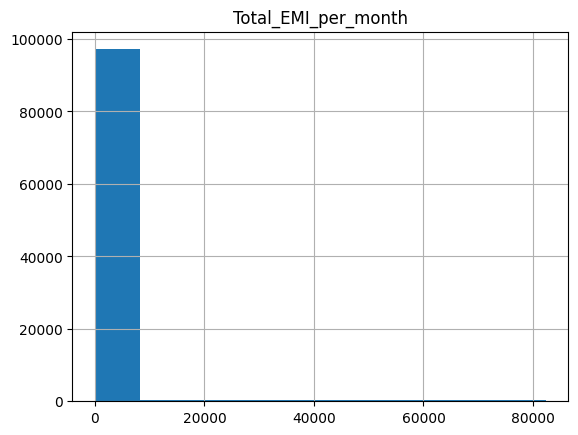

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numerics = data.select_dtypes(include=numerics)
for col in df_numerics:
    plt.figure()
    plt.title(col)
    data[col].hist()

#### Kategoričke varijable

In [ ]:
data = data.dropna(subset=['ID'])
id_stats = data['ID'].describe()
count_value = id_stats['count']
unique_value = id_stats['unique']
top_value = id_stats['top']
frequency_value = id_stats['freq']

print(f"Count: {count_value}")
print(f"Unique: {unique_value}")
print(f"Top Value: {top_value}")
print(f"Frequency: {frequency_value}")

Count: 100022
Unique: 100000
Top Value: 0x14c33
Frequency: 2


Ovo iznad je primjer ispisa podataka za jednu kategoričku varijablu, ali u nastavku ćemo prikazati tabelu koja je će sve ispisati skupa za svaku varijablu.

In [ ]:
!pip install prettytable

In [ ]:
import pandas as pd
from prettytable import PrettyTable


object_columns = data.select_dtypes(include='object').columns

summary_table = PrettyTable()
summary_table.field_names = ['Column', 'Count', 'Unique', 'Top Value', 'Frequency']

for column in object_columns:
    column_stats = data[column].describe()
    count_value = column_stats['count']
    unique_value = column_stats['unique']
    top_value = column_stats['top']
    frequency_value = column_stats['freq']

    summary_table.add_row([column, count_value, unique_value, top_value, frequency_value])


print(summary_table)


+-------------------------+--------+--------+----------------------------------+-----------+
|          Column         | Count  | Unique |            Top Value             | Frequency |
+-------------------------+--------+--------+----------------------------------+-----------+
|            ID           | 100022 | 100000 |             0x14c33              |     2     |
|       Customer_ID       | 100022 | 12500  |            CUS_0x5313            |     9     |
|          Month          | 100022 |   8    |              April               |   12505   |
|       Name_and_Age      | 90034  | 25520  |           Stempelj,35            |     16    |
|           SSN           | 100022 | 12501  |            #F%$D@*&8             |    5576   |
|        Occupation       | 100022 |   46   |             _______              |    7063   |
|      Annual_Income      | 100022 | 18940  |             17273.83             |     16    |
|    Num_Bank_Accounts    | 100022 |  984   |                6        

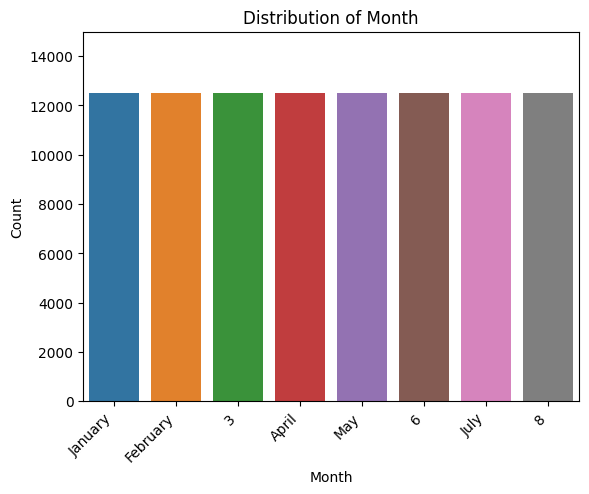

April 12505
8 12504
January 12503
6 12503
3 12502
May 12502
July 12502
February 12501


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor
from collections import Counter
import pandas as pd

def count_category(category, dataframe):
    count = dataframe[dataframe['Month'] == category].shape[0]
    return category, count

def plot_month_distribution_threads(dataframe, column_name, y_limit = 15000):

    # Filter out null and empty values
    dataframe = dataframe.dropna(subset=[column_name])
    dataframe = dataframe[dataframe[column_name].str.strip() != '']

    # Count the occurrences of each category using threads
    categories = dataframe[column_name].unique()
    counts = {}

    with ThreadPoolExecutor() as executor:
        results = executor.map(lambda category: count_category(category, dataframe), categories)

    for result in results:
        category, count = result
        counts[category] = count

    # Plot the bar chart
    sns.barplot(x=list(counts.keys()), y=list(counts.values()))
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, y_limit)
    plt.show()

    month_counts = dataframe['Month'].value_counts()

    for month, count in month_counts.items():
     print(f"{month} {count}")
plot_month_distribution_threads(data, 'Month',y_limit = 15000)




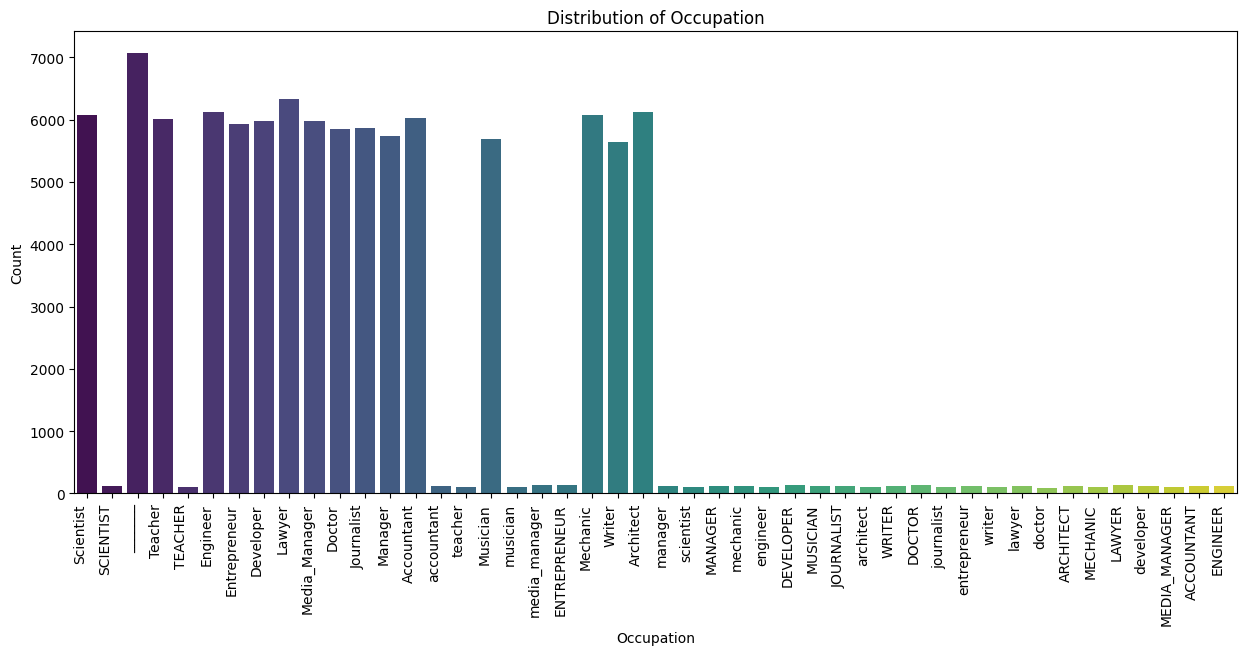

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor
from collections import Counter
import pandas as pd

def count_category(category, dataframe):
    count = dataframe[dataframe['Occupation'] == category].shape[0]
    return category, count

def plot_Occupation_distribution_threads(dataframe, column_name, bar_width=0.8):
    # Filter out null and empty values
    dataframe = dataframe.dropna(subset=[column_name])
    dataframe = dataframe[dataframe[column_name].str.strip() != '']

    # Count the occurrences of each category using threads
    categories = dataframe[column_name].unique()
    counts = {}

    with ThreadPoolExecutor() as executor:
        results = executor.map(lambda category: count_category(category, dataframe), categories)

    for result in results:
        category, count = result
        counts[category] = count

    # Plot the bar chart with adjusted figure size
    fig, ax = plt.subplots(figsize=(15, 6))
    sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette="viridis", dodge=False, errorbar=None, width=bar_width, ax=ax)
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.xticks(rotation=90, ha='right')
    plt.show()


plot_Occupation_distribution_threads(data, 'Occupation', bar_width=0.8)


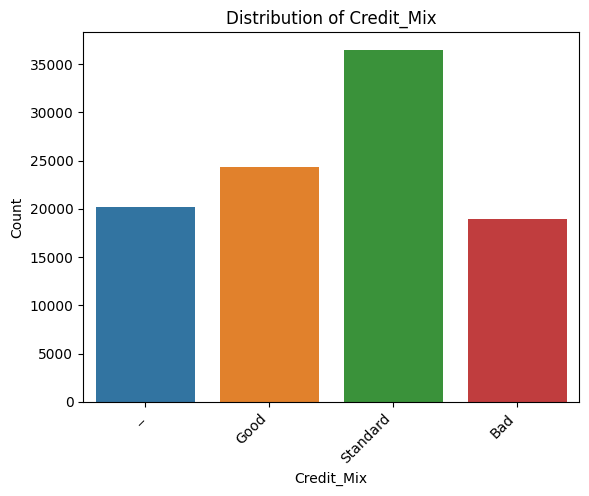

Standard: 36489
Good: 24339
_: 20199
Bad: 18995


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor
from collections import Counter
import pandas as pd

def count_category(category, dataframe):
    count = dataframe[dataframe['Credit_Mix'] == category].shape[0]
    return category, count

def plot_Credit_Mix_distribution_threads(dataframe, column_name):

    # Filter out null and empty values
    dataframe = dataframe.dropna(subset=[column_name])
    dataframe = dataframe[dataframe[column_name].str.strip() != '']


    categories = dataframe[column_name].unique()
    counts = {}

    with ThreadPoolExecutor() as executor:
        results = executor.map(lambda category: count_category(category, dataframe), categories)

    for result in results:
        category, count = result
        counts[category] = count


    sns.barplot(x=list(counts.keys()), y=list(counts.values()))
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    credit_mix = dataframe['Credit_Mix'].value_counts()
    for credit, count in credit_mix.items():
      print(f"{credit}: {count}")

plot_Credit_Mix_distribution_threads(data, 'Credit_Mix')


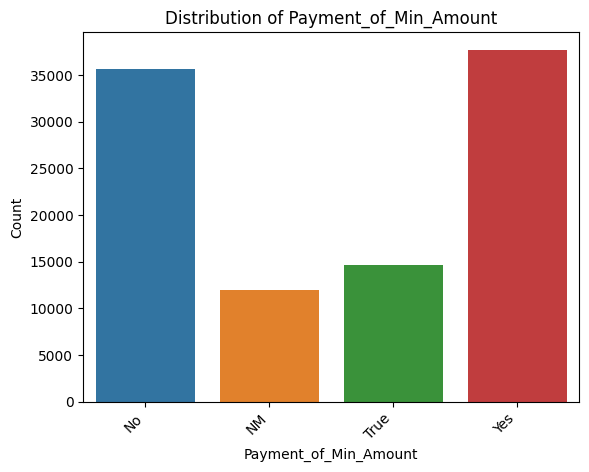

Yes: 37688
No: 35671
True: 14652
NM: 12011


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor
from collections import Counter
import pandas as pd

def count_category(category, dataframe):
    count = dataframe[dataframe['Payment_of_Min_Amount'] == category].shape[0]
    return category, count

def plot_Payment_of_Min_Amount_distribution_threads(dataframe, column_name):

    # Filter out null and empty values
    dataframe = dataframe.dropna(subset=[column_name])
    dataframe = dataframe[dataframe[column_name].str.strip() != '']

    # Count the occurrences of each category using threads
    categories = dataframe[column_name].unique()
    counts = {}

    with ThreadPoolExecutor() as executor:
        results = executor.map(lambda category: count_category(category, dataframe), categories)

    for result in results:
        category, count = result
        counts[category] = count

    sns.barplot(x=list(counts.keys()), y=list(counts.values()))
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    payment_of_Min_Amount = dataframe['Payment_of_Min_Amount'].value_counts()
    for min, count in payment_of_Min_Amount.items():
      print(f"{min}: {count}")

plot_Payment_of_Min_Amount_distribution_threads(data, 'Payment_of_Min_Amount')

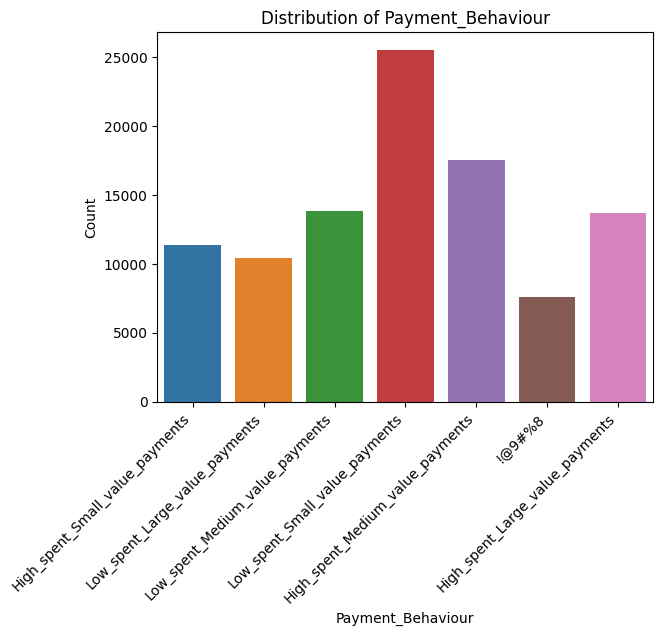

Low_spent_Small_value_payments: 25521
High_spent_Medium_value_payments: 17544
Low_spent_Medium_value_payments: 13862
High_spent_Large_value_payments: 13725
High_spent_Small_value_payments: 11342
Low_spent_Large_value_payments: 10427
!@9#%8: 7601


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor
from collections import Counter
import pandas as pd

def count_category(category, dataframe):
    count = dataframe[dataframe['Payment_Behaviour'] == category].shape[0]
    return category, count

def plot_Payment_Behaviour_distribution_threads(dataframe, column_name):

    # Filter out null and empty values
    dataframe = dataframe.dropna(subset=[column_name])
    dataframe = dataframe[dataframe[column_name].str.strip() != '']

    # Count the occurrences of each category using threads
    categories = dataframe[column_name].unique()
    counts = {}

    with ThreadPoolExecutor() as executor:
        results = executor.map(lambda category: count_category(category, dataframe), categories)

    for result in results:
        category, count = result
        counts[category] = count


    sns.barplot(x=list(counts.keys()), y=list(counts.values()))
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    payment_Behaviour = dataframe['Payment_Behaviour'].value_counts()
    for p, count in payment_Behaviour.items():
      print(f"{p}: {count}")

plot_Payment_Behaviour_distribution_threads(data, 'Payment_Behaviour')


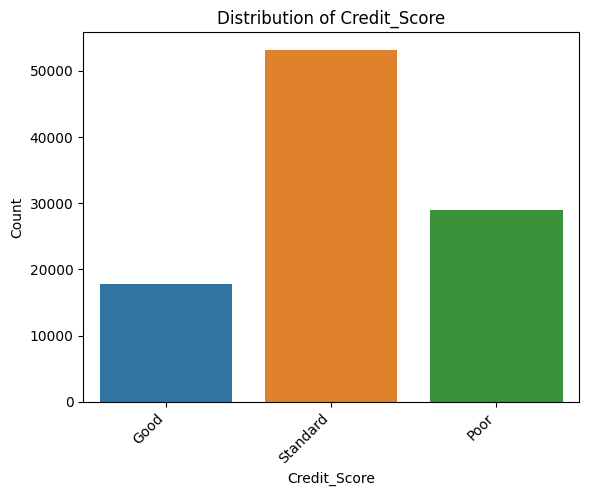

Standard: 53182
Poor: 29008
Good: 17832


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor
from collections import Counter
import pandas as pd

def count_category(category, dataframe):
    count = dataframe[dataframe['Credit_Score'] == category].shape[0]
    return category, count

def plot_Credit_Score_distribution_threads(dataframe, column_name):

    # Filter out null and empty values
    dataframe = dataframe.dropna(subset=[column_name])
    dataframe = dataframe[dataframe[column_name].str.strip() != '']

    # Count the occurrences of each category using threads
    categories = dataframe[column_name].unique()
    counts = {}

    with ThreadPoolExecutor() as executor:
        results = executor.map(lambda category: count_category(category, dataframe), categories)

    for result in results:
        category, count = result
        counts[category] = count

    # Plot the bar chart
    sns.barplot(x=list(counts.keys()), y=list(counts.values()))
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    credit_Score = dataframe['Credit_Score'].value_counts()
    for c, count in credit_Score.items():
      print(f"{c}: {count}")

plot_Credit_Score_distribution_threads(data, 'Credit_Score')


##1.3 Transformacija podataka

$\color{orange}{\text{Napomena: Sve naredne transformacije direktno mijenjaju učitani dataset}}$

Prvi korak prije procesiranja nedostajućih vrijednosti i outliera jeste da sve vrijednosti unutar jedne kolone svedemo na isti tip. Za to će nam biti potrebne različite bibliotečne funkcije iz biblioteka pandas i numpy, kao i naša custom rješenja

In [ ]:
def parse_decimal(value):
    value = str(value)
    # Remove special characters except comma and point!
    cleaned_value = ''.join(char for char in value if char.isdigit() or char in ['.', ',', '-'])
    if ((not cleaned_value) or (cleaned_value == '.') or (cleaned_value == ',') or (cleaned_value == '-')):
      return float(0)
    return float(cleaned_value.replace(',', ''))

Metoda transform_float_column prima parametar key koji određuje float kolonu nad kojom ćemo vršiti transformaciju i uljepšavanje. **Ovo je urađeno zbog prisustva nekoliko kolona koje zahtijevaju ovaj dio transformacije.**

In [ ]:
def transform_float_column(data, key):
  data[key] = data[key].apply(parse_decimal).astype(float)
  return data

Nakon što smo vrijednosti unutar jedne kolone sveli na jedan tip, potrebno je izvršiti transformaciju nedostajućih i outlier vrijednosti. Za to koristimo pomoćne funkcije prikazane ispod

Transformacija kolone korištenjem grupne mode

In [ ]:
def get_mode(x):
  mode_result = pd.Series.mode(x)
  return mode_result[0]

In [ ]:
def transform_column_outliers_group_mode(data, key, group_by, condition):
  grouped_mode = data.groupby(group_by)[key].agg(get_mode)
  data.loc[condition, key] = data.loc[condition, group_by].map(grouped_mode)
  return data

Transformacija kolone korištenjem grupnog medijana

In [ ]:
def transform_column_outliers_group_median(data, key, group_by, condition):
  grouped_median = data.groupby(group_by)[key].median()
  data.loc[condition, key] = data.loc[condition, group_by].map(grouped_median)
  return data

####Unnamed kolone

Kako im je relacijski koeficijent 1 i nemaju ulogu u predikciji credit score, biti će obrisane

In [ ]:
def drop_unnamed_columns(data):
  del data["Unnamed: 0"]
  del data["Unnamed: 0.1"]
  del data["Unnamed: 0.2"]
  return data

In [ ]:
drop_unnamed_columns(data)

,ID,Customer_ID,Month,Name_and_Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,"Aaron Maashoh,23",821-00-0265,Scientist,19114.12,1824.843333,3,4,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,0x1603,CUS_0xd40,February,"Aaron Maashoh,23",821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,0x1604,CUS_0xd40,3,"Aaron Maashoh,-500",821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,0x1605,CUS_0xd40,April,"Aaron Maashoh,23",821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,0x1606,CUS_0xd40,May,"Aaron Maashoh,23",821-00-0265,SCIENTIST,19114.12,1824.843333,3,4,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100017,0x25fe9,CUS_0x942c,April,"Nicks,25",078-73-5990,Mechanic,39628.99,3359.415833,4,6,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133256,High_spent_Large_value_payments,479.866228,Poor
100018,0x25fea,CUS_0x942c,May,"Nicks,25",078-73-5990,Mechanic,39628.99,3359.415833,4,6,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595029,High_spent_Medium_value_payments,496.65161,Poor
100019,0x25feb,CUS_0x942c,6,"Nicks,25",078-73-5990,Mechanic,39628.99,3359.415833,4,6 cards,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847745,High_spent_Large_value_payments,516.809083,Poor
100020,0x25fec,CUS_0x942c,July,"Nicks,25",078-73-5990,Mechanic,39628.99,3359.415833,4,6,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.6725822,Low_spent_Large_value_payments,319.164979,Standard


####Month

In [ ]:
import calendar
month_names = list(calendar.month_name)[1:]
month_indexes = list(map(lambda x: month_names.index(x) + 1, month_names))

all_months_values = list(map(lambda x: str(x), month_names + month_indexes))

month_rows = data["Month"]
corrupted_rows_exists = ~month_rows.isin(all_months_values).any()
print(corrupted_rows_exists)

False


Prethodnim isječkom skripte smo dokazali da Month kolona sadrži validne vrijednosti mjeseci - naziv mjeseca ili njegov broj u godini

**Transformisati ćemo je na način da naziv mjeseca konvertujemo u broj**

In [ ]:
from datetime import datetime

def monthNameToNumber(month_name):
  # Convert to number
  return str(datetime.strptime(month_name, "%B").month)

In [ ]:
def transformMonth(data):
  month_numbers = list(map(lambda x: str(x), range(1,13)))
  data["Month"] = data["Month"].apply(lambda x: str(x))
  data.loc[~data["Month"].isin(month_numbers), "Month"] = data.loc[~data["Month"].isin(month_numbers), "Month"].apply(lambda x: monthNameToNumber(x))
  data["Month"] = pd.to_numeric(data["Month"]).astype(int)
  return data

In [ ]:
data = transformMonth(data)
data["Month"].dtype

dtype('int64')

#### Name_and_Age

Kolona Name_and_Age je u formatu Ime Prezime,Godine. Stoga ćemo ovu kolonu razdvojiti na dvije kolone prije analize nedostajućih ili ekstremnih vrijednosti unutar njih

In [ ]:
def drop_name_and_age(data):
  del data['Name_and_Age']
  return data

In [ ]:
def split_name_and_age(data):
  data["Name_and_Age"] = data['Name_and_Age'].apply(lambda x: str(x).strip(","))
  data['Name_and_Age'] = data['Name_and_Age'].fillna(",")
  data[['Name', 'Age']] = data['Name_and_Age'].str.split(',', n=1, expand=True)
  data = drop_name_and_age(data)
  return data

In [ ]:
data = split_name_and_age(data)
data["Age"]

0           23
1           23
2         -500
3           23
4           23
          ... 
100017      25
100018      25
100019      25
100020      25
100021      25
Name: Age, Length: 100022, dtype: object

**Prethodni isječak koda nam ne garantuje da su vrijednosti u kolonama Name i Age validne, s toga je potrebna dodatna transformacija**

#####Age

In [ ]:
def transform_age(data):
  data = transform_float_column(data, "Age")
  data["Age"] = data["Age"].astype('Int64')
  return data

In [ ]:
data = transform_age(data)
data["Age"].dtype

Int64Dtype()

Sve vrijednosti atributa Age koje nisu u opsegu 18-120 su transformisane koristeći grupnu modu po Customer_ID

In [ ]:
def transform_age_outliers_group_mode(data):
  condition = (data["Age"] < 18) | (data["Age"] > 120)
  return transform_column_outliers_group_mode(data, "Age", "Customer_ID", condition)

In [ ]:
data = transform_age_outliers_group_mode(data)

#####Name

In [ ]:
import re
def parse_name(name):
  pattern = r'^[A-Za-z]+(?: [A-Za-z]+)?$'
  matched = re.match(pattern, name)

  if matched:
      return matched.group(0)
  else:
      return ""

In [ ]:
def transform_name(data):
  data["Name"] = data["Name"].apply(parse_name)
  return data

In [ ]:
# data = transform_name(data)
data["Name"][7]

'nan'

Transformacija nevalidnih vrijednosti - grupna moda

In [ ]:
def transform_name_grouped_mode(data):
  condition = (data["Name"].str.lstrip().str.rstrip() == "") | (data["Name"].str.lower() == "nan") | (data["Name"].str.lower() == "none")
  return transform_column_outliers_group_mode(data, "Name", "Customer_ID", condition)

In [ ]:
data = transform_name_grouped_mode(data)

$\color{orange}{\text{Update: }}$ Obzirom da atribut Customer_ID u potpunosti identificira jednu individualnu osobu, atribut Name nam nije od značaja pri samoj predikciji te ga s toga možemo obrisati

In [ ]:
def drop_name(data):
  del data["Name"]
  return data

In [ ]:
data = drop_name(data)

####SSN

Ova kolona ima specifičan format koji treba slijediti - XXX-XX-XXXX

Sve ćelije koje nemaju ovaj format transformišemo za početak u NaN

In [ ]:
def transform_ssn(data):
  # Define a regular expression pattern for SSN format
  ssn_pattern = r'^\d{3}-\d{2}-\d{4}$'
  data["SSN"] = data["SSN"].astype(str)
  # Replace values that do not match the SSN pattern with empty string
  data['SSN'] = data['SSN'].where(data['SSN'].str.match(ssn_pattern), "")
  data["SSN"] = data["SSN"].astype(str)
  return data

In [ ]:
data = transform_ssn(data)
data["SSN"].dtype

dtype('O')

Transformacija nevalidnih vrijednosti - grupna moda

In [ ]:
def transform_ssn_grouped_mode(data):
  condition = data["SSN"] == ""
  return transform_column_outliers_group_mode(data, "SSN", "Customer_ID", condition)

In [ ]:
data = transform_ssn_grouped_mode(data)

$\color{orange}{\text{Update: }}$ Obzirom da atribut Customer_ID u potpunosti identificira jednu individualnu osobu, atribut SSN nam nije od značaja pri samoj predikciji te ga s toga možemo obrisati

In [ ]:
def drop_ssn(data):
  del data["SSN"]
  return data

In [ ]:
data = drop_ssn(data)

####Occupation

Occupation kolona sigurno treba da ima konačan broj vrijednosti, a listu mogućih vrijednosti ćemo izvući iz kolone

In [ ]:
def occupation_distinct(value):
    return value.lower()  # Consider case-insensitive uniqueness

In [ ]:
def get_occupation_distinct_values(data):
  data["Occupation"] = data["Occupation"].astype(str)
  distinct_values = data['Occupation'].apply(occupation_distinct).unique().astype(str)
  sorted = np.sort(distinct_values)
  return sorted

In [ ]:
get_occupation_distinct_values(data)

array(['_______', 'accountant', 'architect', 'developer', 'doctor',
       'engineer', 'entrepreneur', 'journalist', 'lawyer', 'manager',
       'mechanic', 'media_manager', 'musician', 'scientist', 'teacher',
       'writer'], dtype='<U13')

Kreiramo enum za Occupation

In [ ]:
from enum import Enum

class Occupation(Enum):
  NONE = 0,
  ACCOUNTANT = 1,
  ARCHITECT = 2,
  DEVELOPER = 3,
  DOCTOR = 4,
  ENGINEER = 5,
  ENTERPRENEUR = 6,
  JOURNALIST = 7,
  LAWYER = 8,
  MANAGER = 9,
  MECHANIC = 10,
  MEDIA_MANAGER = 11,
  MUSICIAN = 12,
  SCIENTIST = 13,
  TEACHER = 14,
  WRITER = 15

Koristiti ćemo enum definisan iznad za konverziju Occupation kolone u int vrijednost umjesto string, zbog lakših operacija

In [ ]:
def map_occupation_enum(occupation_name):
  try:
    return Occupation[occupation_name.upper()].value[0]
  except:
    return Occupation.NONE.value[0]

In [ ]:
def transform_occupation(data):
  data['Occupation'] = data['Occupation'].astype(str)
  data['Occupation'] = data['Occupation'].apply(map_occupation_enum)
  data['Occupation']
  return data

In [ ]:
data = transform_occupation(data)
data['Occupation']

0         13
1         13
2         13
3         13
4         13
          ..
100017    10
100018    10
100019    10
100020    10
100021    10
Name: Occupation, Length: 100022, dtype: int64

Moguće nedostajuće vrijednosti sada imaju int vrijednost 0, te ćemo njih transformisati korištenjem grupne mode

In [ ]:
def transform_occupation_grouped_mode(data):
  condition = data["Occupation"] == 0
  return transform_column_outliers_group_mode(data, "Occupation", "Customer_ID", condition)

In [ ]:
data = transform_occupation_grouped_mode(data)

####Annual_Income

Parsiramo decimalnu vrijednost pri čemu odbijamo sve karaktere koji nisu broj, zarez ili tačka (Tačku i zarez ostavljamo jer one mogu pripadati validnom zapisu broja)

In [ ]:
def transform_annual_income(data):
  data = transform_float_column(data, "Annual_Income")
  return data

In [ ]:
data = transform_annual_income(data)
data["Annual_Income"]

0         19114.12
1         19114.12
2         19114.12
3         19114.12
4         19114.12
            ...   
100017    39628.99
100018    39628.99
100019    39628.99
100020    39628.99
100021    39628.99
Name: Annual_Income, Length: 100022, dtype: float64

Transformacija nepodobnih vrijednosti - Grupni medijan

In [ ]:
def transform_annual_income_group_median(data):
  condition = data["Annual_Income"] <= 0
  return transform_column_outliers_group_median(data, "Annual_Income", "Customer_ID", condition)

####Monthly_Inhand_Salary

Za ovu kolonu primjenjujemo istu transformaciju kao i za Annual Income

In [ ]:
# data = pd.read_csv(path)
data = transform_float_column(data, "Monthly_Inhand_Salary")
data["Monthly_Inhand_Salary"]

0         1824.843333
1            0.000000
2            0.000000
3            0.000000
4         1824.843333
             ...     
100017    3359.415833
100018    3359.415833
100019    3359.415833
100020    3359.415833
100021    3359.415833
Name: Monthly_Inhand_Salary, Length: 100022, dtype: float64

Transformacija outliers - grupni medijan

In [ ]:
def transform_monthly_inhand_salary_group_median(data):
  condition = data["Monthly_Inhand_Salary"] <= 0
  return transform_column_outliers_group_median(data, "Monthly_Inhand_Salary", "Customer_ID", condition)

In [ ]:
data = transform_monthly_inhand_salary_group_median(data)
data["Monthly_Inhand_Salary"]

0         1824.843333
1          912.421667
2          912.421667
3          912.421667
4         1824.843333
             ...     
100017    3359.415833
100018    3359.415833
100019    3359.415833
100020    3359.415833
100021    3359.415833
Name: Monthly_Inhand_Salary, Length: 100022, dtype: float64

####Num_Bank_Accounts

Ova kolona u osnovi treba biti numerička, iako neke ćelije sadrže i karaktere pored brojeva

In [ ]:
def transform_num_bank_accounts(data):
  data = transform_float_column(data, "Num_Bank_Accounts")
  data["Num_Bank_Accounts"] = data["Num_Bank_Accounts"].astype('Int64')
  return data

In [ ]:
# data = pd.read_csv(path)
transform_num_bank_accounts(data)

,ID,Customer_ID,Month,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Age
0,0x1602,CUS_0xd40,1,13,19114.12,1824.843333,3,4,3,4,...,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good,23
1,0x1603,CUS_0xd40,2,13,19114.12,912.421667,3,4,3,4,...,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good,23
2,0x1604,CUS_0xd40,3,13,19114.12,912.421667,3,4,3,4,...,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good,23
3,0x1605,CUS_0xd40,4,13,19114.12,912.421667,3,4,3,4,...,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good,23
4,0x1606,CUS_0xd40,5,13,19114.12,1824.843333,3,4,3,4,...,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100017,0x25fe9,CUS_0x942c,4,10,39628.99,3359.415833,4,6,7,2,...,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133256,High_spent_Large_value_payments,479.866228,Poor,25
100018,0x25fea,CUS_0x942c,5,10,39628.99,3359.415833,4,6,7,2,...,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595029,High_spent_Medium_value_payments,496.65161,Poor,25
100019,0x25feb,CUS_0x942c,6,10,39628.99,3359.415833,4,6 cards,5729,2,...,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847745,High_spent_Large_value_payments,516.809083,Poor,25
100020,0x25fec,CUS_0x942c,7,10,39628.99,3359.415833,4,6,7,2,...,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.6725822,Low_spent_Large_value_payments,319.164979,Standard,25


Transformacija outliers- grupna moda

In [ ]:
def transform_num_bank_accounts_grouped_mode(data):
  condition = (data["Num_Bank_Accounts"] <= 0) | (data["Num_Bank_Accounts"] > 100)
  return transform_column_outliers_group_mode(data, "Num_Bank_Accounts", "Customer_ID", condition)

In [ ]:
data = transform_num_bank_accounts_grouped_mode(data)

####Num_Credit_Card

Još jedna numerička kolona kod koje ćemo također provjeriti da li već korištena metoda parse_decimal zadovoljava

In [ ]:
def transform_num_credit_card(data):
  data =  transform_float_column(data, 'Num_Credit_Card')
  data["Num_Credit_Card"] = data["Num_Credit_Card"].astype('Int64')
  return data

In [ ]:
data = transform_num_credit_card(data)

Transformacija outliers - grupna moda

In [ ]:
def transform_num_credit_card_grouped_mode(data):
  condition = (data["Num_Credit_Card"] <= 0) | (data["Num_Credit_Card"] > 100)
  return transform_column_outliers_group_mode(data, "Num_Credit_Card", "Customer_ID", condition)

In [ ]:
data = transform_num_credit_card_grouped_mode(data)

####Interest_Rate

Budući da je tip kolone već određen sa int64, ne bi trebalo da imamo nekih nenumeričkih vrijednosti (osim eventualno nedostajućih vrijednosti - NaN)

In [ ]:
data["Interest_Rate"]

0            3
1            3
2            3
3            3
4            3
          ... 
100017       7
100018       7
100019    5729
100020       7
100021       7
Name: Interest_Rate, Length: 100022, dtype: int64

Transformacija outliers - grupna moda

In [ ]:
def transform_interest_rate_grouped_mode(data):
  condition = data["Interest_Rate"] > 1000
  return transform_column_outliers_group_mode(data, "Interest_Rate", "Customer_ID", condition)

In [ ]:
data = transform_interest_rate_grouped_mode(data)

####Num_of_Loan

Num_of_Loan predstavlja integer kolonu te ćemo uz pomoć postojeće metode parse_float_column parsirati brojeve iz svake ćelije (koje mogu sadržavati i neke specijalne karaktere osim brojeva) te ih finalno konvertovati u integer

In [ ]:
def transform_num_of_loan(data):
  data = transform_float_column(data, "Num_of_Loan")
  data["Num_of_Loan"] = data["Num_of_Loan"].astype('Int64')
  return data

In [ ]:
data = transform_num_of_loan(data)

Transformacija outliers - grupna moda

In [ ]:
def transform_num_of_loan_grouped_mode(data):
  condition = (data["Num_of_Loan"] <= 0) | (data["Num_of_Loan"] > 100)
  return transform_column_outliers_group_mode(data, "Num_of_Loan", "Customer_ID", condition)

In [ ]:
data = transform_num_of_loan_grouped_mode(data)

####Type_of_Loan - $\color{orange}{\textbf{Pogledati obavezno}}$

$\color{red}{\textbf{Napomena}}$: *Kod u nastavku proširuje dataset zbog razdvajanja kolone koja je tipa liste na pojedinačne redove. Zbog memorijskog limita Google Colab okruženja nije moguće agregirati razdvojene vrijednosti Type_of_Loan nazad u listu. Uz dodatnu analizu biće određeno da li je ova kolona uopšte od interesa.*

Ova kolona veže više loan tipova za jedan dataset rekord, obzirom da su različiti tipovi odvojeni zarezom. Također, zadnji navedeni tip je osim zarezom odvojen veznikom and. Zbog toga smo serijom različitih transformacija **(zamjena "and" sa praznim stringom, razdvajanje spojenih loan tipova na listu sa funkcijom split te razdvajanjem liste na pojedinačne redove dataframe-a)** izvukli set različitih pojedinačnih vrijednosti kada je u pitanju ova kolona.

<!-- (Ovo i dalje znači da će kolona biti kompozitnog karaktera - sastavljena od više vrijednosti za loan_type, ali ćemo izvući set iz kojih se pojedinačne virjednosti mogu uzeti). -->

Sljedeći isječak koda pokazuje na koji način smo odredili set mogućih vrijednosti za ovu kolonu.

Dodatno, dataframe je proširen na način da su zbog prirode kolone type_of_loan koja predstavlja listu, dodani novi redovi koji predstavljaju razdvojenu listu vrijednosti ove kolone.

In [ ]:
def split_explode_type_of_loan(data):
  data["Type_of_Loan"] = data['Type_of_Loan'].apply(lambda x: str(x).strip(",").replace("and ", ""))
  data["Type_of_Loan"] = data['Type_of_Loan'].str.split(',')
  data = data.explode('Type_of_Loan').reset_index(drop=True)
  data["Type_of_Loan"] = data["Type_of_Loan"].apply(lambda x: str(x).lstrip().rstrip())
  return data

In [ ]:
def type_of_loan_get_unique_values(data):
  exploded_data = data.copy()
  exploded_data = split_explode_type_of_loan(exploded_data)
  # Get unique values
  unique_values = exploded_data['Type_of_Loan'].unique()
  return unique_values

In [ ]:
# data = pd.read_csv(path)
distinct_values = type_of_loan_get_unique_values(data)
distinct_values

array(['Auto Loan', 'Credit-Builder Loan', 'Personal Loan',
       'Home Equity Loan', 'Not Specified', 'uknown', 'nan',
       'Mortgage Loan', 'Student Loan', 'Debt Consolidation Loan',
       'Payday Loan'], dtype=object)

Kreirati ćemo enum za loan_type da bismo string vrijednosti konvertovali u brojeve

In [ ]:
from enum import Enum
class LoanType(Enum):
  NOT_SPECIFIED = 0,
  AUTO_LOAN = 1,
  CREDIT_BUILDER_LOAN = 2,
  PERSONAL_LOAN = 3,
  HOME_EQUITY_LOAN = 4,
  MORTGAGE_LOAN = 5,
  STUDENT_LOAN = 6,
  DEBT_CONSOLIDATION_LOAN = 7
  PAYDAY_LOAN = 8

Mapa koju ćemo koristiti prilikom konverzije

In [ ]:
def stringToLoanTypeMap():
  return {
      "Auto Loan": LoanType.AUTO_LOAN,
      "Credit-Builder Loan": LoanType.CREDIT_BUILDER_LOAN,
      "Personal Loan": LoanType.PERSONAL_LOAN,
      "Home Equity Loan": LoanType.HOME_EQUITY_LOAN,
      "Mortgage Loan": LoanType.MORTGAGE_LOAN,
      "Student Loan": LoanType.STUDENT_LOAN,
      "Debt Consolidation Loan": LoanType.DEBT_CONSOLIDATION_LOAN,
      "Payday Loan": LoanType.PAYDAY_LOAN
  }

Funkcija za konverziju

In [ ]:
def convert_to_type_of_loan_enum(string_value):
  try:
    enum_value = stringToLoanTypeMap()[string_value].value[0]
  except:
    enum_value = LoanType.NOT_SPECIFIED.value[0]
  return enum_value

In [ ]:
def transform_type_of_loan(data):
  data = split_explode_type_of_loan(data);
  data["Type_of_Loan"] = data["Type_of_Loan"].apply(convert_to_type_of_loan_enum)

  return data

Odabrati željenu opciju - obrisati kolonu ili je zadržati

In [ ]:
del data["Type_of_Loan"]

In [ ]:
#data = transform_type_of_loan(data)

####Delay_from_due_date

Još jedna integer kolona koju nije potrebno transformisati s aspekta njenog tipa.

In [ ]:
distinct_values = data["Delay_from_due_date"].unique()
distinct_values.dtype

dtype('int64')

Transformacija outliers - grupna moda

In [ ]:
def transform_delay_from_due_date_grouped_mode(data):
  condition = data["Delay_from_due_date"] < 0
  return transform_column_outliers_group_mode(data, "Delay_from_due_date", "Customer_ID", condition)

In [ ]:
data = transform_delay_from_due_date_grouped_mode(data)

####Num_of_Delayed_Payment

Kolona sa identičnim šumovima kao i prethodne integer kolone. Postupamo identično.

In [ ]:
def transform_num_of_delayed_payment(data):
  data = transform_float_column(data, "Num_of_Delayed_Payment")
  data["Num_of_Delayed_Payment"] = data["Num_of_Delayed_Payment"].astype('Int64')
  return data

In [ ]:
data = transform_num_of_delayed_payment(data)
data["Num_of_Delayed_Payment"]

0         7
1         0
2         7
3         4
4         0
         ..
100017    7
100018    7
100019    6
100020    0
100021    6
Name: Num_of_Delayed_Payment, Length: 100022, dtype: Int64

Transformacija outliers - grupni medijan

In [ ]:
def transform_num_of_delayed_payment_grouped_median(data):
  condition = data["Num_of_Delayed_Payment"] == 0.0
  data = transform_column_outliers_group_median(data, "Num_of_Delayed_Payment", "Customer_ID", condition)
  # data["Num_of_Delayed_Payment"] = data["Num_of_Delayed_Payment"].astype('Int64')
  return data

In [ ]:
# data = transform_num_of_delayed_payment_grouped_median(data)
# data["Num_of_Delayed_Payment"][1]
data.loc[data["Num_of_Delayed_Payment"] <= 0]

,ID,Customer_ID,Month,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Age
1,0x1603,CUS_0xd40,2,13,19114.12,912.421667,3,4,3,4,...,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good,23
4,0x1606,CUS_0xd40,5,13,19114.12,1824.843333,3,4,3,4,...,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good,23
10,0x1610,CUS_0x21b1,3,14,34847.84,3037.986667,2,4,6,1,...,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.5159757,High_spent_Large_value_payments,466.4664764,Standard,28
13,0x1613,CUS_0x21b1,6,14,34847.84,3037.986667,2,4,6,1,...,605.03,33.381010,27 Years and 0 Months,No,18.816215,43.47719014,High_spent_Large_value_payments,481.5052619,Good,28
30,0x162c,CUS_0xb891,7,0,30689.89,2612.490833,2,5,4,1,...,632.46,26.056395,17 Years and 9 Months,No,16.415452,71.28367488,Low_spent_Large_value_payments,443.5499568,Standard,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,0x25fc8,CUS_0xf16,7,11,16680.35,1528.029167,1,1,5,4,...,897.16,36.166925,21 Years and 7 Months,No,41.113561,NaN,Low_spent_Small_value_payments,340.684834,Good,45
99997,0x25fc9,CUS_0xf16,8,11,16680.35,1528.029167,1,1,5,4,...,897.16,41.212367,NaN,No,41.113561,70.80554978,Low_spent_Large_value_payments,310.883806,Good,45
100014,0x25fe6,CUS_0x942c,1,10,39628.99,3359.415833,4,6,7,2,...,502.38,32.991333,31 Years and 3 Months,No,35.104023,401.1964806,Low_spent_Small_value_payments,189.64108,Poor,24
100015,0x25fe7,CUS_0x942c,2,10,39628.99,3359.415833,4,6,7,2,...,502.38,29.135447,31 Years and 4 Months,No,58638.000000,180.7330952,Low_spent_Medium_value_payments,400.104466,Standard,25


####Changed_Credit_Limit

Vrijednosti u ovoj koloni su float vrijednosti ili znak '_'. Zbog pojavljivanja tog znaka, transformisat ćemo podatke, pretvarajući te vrijednosti u 0.

In [ ]:
data['Changed_Credit_Limit'].unique()

array(['11.27', '_', '6.27', ..., '27.38', '25.16', '21.17'], dtype=object)

In [ ]:
def transform_changed_credit_limit(data):
  data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].apply(lambda x: '0' if x == '_' else x).astype('float64')
  return data

In [ ]:
data = transform_changed_credit_limit(data)
data["Changed_Credit_Limit"]

0         11.27
1         11.27
2          0.00
3          6.27
4         11.27
          ...  
100017    11.50
100018    11.50
100019    11.50
100020    11.50
100021    11.50
Name: Changed_Credit_Limit, Length: 100022, dtype: float64

Transformacija outliers - grupni medijan

In [ ]:
def transform_changed_credit_limit_grouped_median(data):
  condition = data["Changed_Credit_Limit"] > 35
  data = transform_column_outliers_group_median(data, "Changed_Credit_Limit", "Customer_ID", condition)
  data["Changed_Credit_Limit"] = data["Changed_Credit_Limit"]
  return data

In [ ]:
data = transform_changed_credit_limit_grouped_median(data)
data["Changed_Credit_Limit"]

0         11.27
1         11.27
2          0.00
3          6.27
4         11.27
          ...  
100017    11.50
100018    11.50
100019    11.50
100020    11.50
100021    11.50
Name: Changed_Credit_Limit, Length: 100022, dtype: float64

####Num_Credit_Inquiries

Vrijednosti u ovoj koloni su tipa int, ali neke vrijednosti su NaN, pa smo ih transformisali u 0, te označili da su elementi ove kolone tipa int64.

In [ ]:
data['Num_Credit_Inquiries'].unique()

array([   4.,    2.,    3., ..., 1361.,  310.,   74.])

In [ ]:
def transform_num_credit_inquiries(data):
  data['Num_Credit_Inquiries'] = data['Num_Credit_Inquiries'].apply(lambda x: '0' if pd.isna(x) else x).astype('int64')
  return data

In [ ]:
data = transform_num_credit_inquiries(data)
data["Num_Credit_Inquiries"]

0         4
1         4
2         4
3         4
4         4
         ..
100017    3
100018    3
100019    3
100020    3
100021    3
Name: Num_Credit_Inquiries, Length: 100022, dtype: int64

Transformacija outliers - grupni medijan

In [ ]:
def transform_num_credit_inquiries_group_median(data):
  condition = data["Num_Credit_Inquiries"] > 500
  return transform_column_outliers_group_median(data, "Num_Credit_Inquiries", "Customer_ID", condition)

In [ ]:
data = transform_num_credit_inquiries_group_median(data)
data["Num_Credit_Inquiries"]

0         4.0
1         4.0
2         4.0
3         4.0
4         4.0
         ... 
100017    3.0
100018    3.0
100019    3.0
100020    3.0
100021    3.0
Name: Num_Credit_Inquiries, Length: 100022, dtype: float64

####Credit_Mix

U ovoj koloni se pojavljuju četiri različite vrijednosti, tako da ćemo napraviti enum i mapirati te vrijednosti. Nakon ovih transformacija kolona ima elemente tipa int64.

In [ ]:
data['Credit_Mix'].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [ ]:
from enum import Enum

class CreditMix(Enum):
  NONE = 0,
  GOOD = 1,
  STANDARD = 2,
  BAD = 3

In [ ]:
def map_credit_mix_enum(credit_mix):
  try:
    return CreditMix[credit_mix.upper()].value[0]
  except:
    return CreditMix.NONE.value[0]

In [ ]:
def transform_credit_mix(data):
  data['Credit_Mix'] = data['Credit_Mix'].astype(str)
  data['Credit_Mix'] = data['Credit_Mix'].apply(map_credit_mix_enum)
  return data

In [ ]:
data = transform_credit_mix(data)
data["Credit_Mix"]

0         0
1         1
2         1
3         1
4         1
         ..
100017    0
100018    0
100019    1
100020    1
100021    1
Name: Credit_Mix, Length: 100022, dtype: int64

In [ ]:
data['Credit_Mix'].unique()

array([0, 1, 2])

####Outstanding_Debt

Ovu kolonu transformišemo kao prethodne kolone s elementima tipa float. Za ovu kolonu ne moramo raditi transformaciju outliers, jer ih nema.

In [ ]:
data['Outstanding_Debt'].unique()

array(['809.98', '605.03', '1303.01', ..., '3571.7_', '3571.7', '502.38'],
      dtype=object)

In [ ]:
def transform_outstanding_debt(data):
  data = transform_float_column(data, "Outstanding_Debt")
  return data

In [ ]:
data = transform_outstanding_debt(data)
data["Outstanding_Debt"]

0         809.98
1         809.98
2         809.98
3         809.98
4         809.98
           ...  
100017    502.38
100018    502.38
100019    502.38
100020    502.38
100021    502.38
Name: Outstanding_Debt, Length: 100022, dtype: float64

####Credit_Utilization_Ratio

Za ovu kolonu ćemo samo uraditi transformaciju outliers.

In [ ]:
data['Credit_Utilization_Ratio'].unique()

array([26.82261962, 31.94496006, 28.60935202, ..., 41.25552226,
       33.63820798, 34.19246265])

Transformacija outliers - grupni medijan

In [ ]:
def transform_credit_utilization_ratio_grouped_median(data):
  condition = (data["Credit_Utilization_Ratio"] < 22) | (data["Credit_Utilization_Ratio"] > 42)
  data = transform_column_outliers_group_median(data, "Credit_Utilization_Ratio", "Customer_ID", condition)
  data["Credit_Utilization_Ratio"] = data["Credit_Utilization_Ratio"]
  return data

In [ ]:
data = transform_credit_utilization_ratio_grouped_median(data)
data["Credit_Utilization_Ratio"]

0         26.822620
1         31.944960
2         28.609352
3         31.377862
4         24.797347
            ...    
100017    34.663572
100018    40.565631
100019    41.255522
100020    33.638208
100021    34.192463
Name: Credit_Utilization_Ratio, Length: 100022, dtype: float64

####Credit_History_Age

Ovu kolonu ćemo razdvojiti na dvije kolone: za godine i za mjesece.

In [ ]:
data['Credit_History_Age'].unique()

array(['22 Years and 1 Months', nan, '22 Years and 3 Months',
       '22 Years and 4 Months', '22 Years and 5 Months',
       '22 Years and 6 Months', '22 Years and 7 Months',
       '26 Years and 7 Months', '26 Years and 8 Months',
       '26 Years and 9 Months', '26 Years and 10 Months',
       '26 Years and 11 Months', '27 Years and 0 Months',
       '27 Years and 1 Months', '27 Years and 2 Months',
       '17 Years and 9 Months', '17 Years and 10 Months',
       '17 Years and 11 Months', '18 Years and 1 Months',
       '18 Years and 2 Months', '18 Years and 3 Months',
       '18 Years and 4 Months', '17 Years and 3 Months',
       '17 Years and 4 Months', '17 Years and 5 Months',
       '17 Years and 6 Months', '17 Years and 7 Months',
       '17 Years and 8 Months', '30 Years and 8 Months',
       '30 Years and 9 Months', '30 Years and 10 Months',
       '30 Years and 11 Months', '31 Years and 0 Months',
       '31 Years and 1 Months', '31 Years and 2 Months',
       '31 Years and

In [ ]:
def drop_credit_history_age(data):
  del data['Credit_History_Age']
  return data

In [ ]:
def split_years_and_months(data):
  age_parts = data['Credit_History_Age'].str.extract(r'(\d+) Years and (\d+) Months')

  data['Credit_History_Age_Years'] = pd.to_numeric(age_parts[0], errors='coerce').fillna(0)
  data['Credit_History_Age_Months'] = pd.to_numeric(age_parts[1], errors='coerce').fillna(0)

  data['Credit_History_Age_Years'] = data['Credit_History_Age_Years'].astype('Int64')
  data['Credit_History_Age_Months'] = data['Credit_History_Age_Months'].astype('Int64')

  data = drop_credit_history_age(data)

  return data

In [ ]:
data = split_years_and_months(data)
data["Credit_History_Age_Years"]

0         22
1          0
2         22
3         22
4         22
          ..
100017    31
100018    31
100019    31
100020    31
100021    31
Name: Credit_History_Age_Years, Length: 100022, dtype: Int64

Transformacija outlier i nevalidnih vrijednosti - grupna moda

In [ ]:
def transform_credit_history_age_years_group_mode(data):
  condition = data["Credit_History_Age_Years"] <= 0
  return transform_column_outliers_group_mode(data, "Credit_History_Age_Years", "Customer_ID", condition)

In [ ]:
data = transform_credit_history_age_years_group_mode(data)

In [ ]:
data['Credit_History_Age_Months']

0          1
1          0
2          3
3          4
4          5
          ..
100017     6
100018     7
100019     8
100020     9
100021    10
Name: Credit_History_Age_Months, Length: 100022, dtype: Int64

In [ ]:
def transform_credit_history_age_months_group_mode(data):
  condition = data["Credit_History_Age_Months"] <= 0
  return transform_column_outliers_group_mode(data, "Credit_History_Age_Months", "Customer_ID", condition)

In [ ]:
data = transform_credit_history_age_months_group_mode(data)

####Payment_of_Min_Amount

Kolona Payment_of_Min_Amount ima vrijednosti 'No', 'NM', 'True' i 'Yes'. S obzirom na te vrijednosti, elemente ćemo joj transformisati u boolean vrijednosti.

Dodatno, boolean vrijednosti ćemo predstaviti kao bite, gdje vrijedi False=0 i True=1.

In [ ]:
data['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'True', 'Yes'], dtype=object)

In [ ]:
def transform_payment_of_min_amount(data):
    mapping = {'No': False, 'NM': False, 'True': True, 'Yes': True}
    data['Payment_of_Min_Amount'] = data['Payment_of_Min_Amount'].map(mapping).astype(int)
    return data

In [ ]:
data = transform_payment_of_min_amount(data)
data["Payment_of_Min_Amount"]

0         0
1         0
2         0
3         0
4         0
         ..
100017    0
100018    0
100019    0
100020    0
100021    0
Name: Payment_of_Min_Amount, Length: 100022, dtype: int64

####Total_EMI_per_month

Ova kolona se transformiše kao i neke prethodne kolone koristeći transform_float_column. Također, da ne bi ostalo object, elementi se označavaju kao elementi tipa float64.

In [ ]:
data['Total_EMI_per_month'].unique()

array([4.95749492e+01, 1.88162146e+01, 2.46992320e+02, ...,
       1.21120000e+04, 3.51040226e+01, 5.86380000e+04])

In [ ]:
def transform_total_emi_per_month(data):
  data = transform_float_column(data, "Total_EMI_per_month")
  data["Total_EMI_per_month"] = data["Total_EMI_per_month"].astype(np.float64)
  return data

In [ ]:
data = transform_total_emi_per_month(data)
data["Total_EMI_per_month"]

0         49.574949
1         49.574949
2         49.574949
3         49.574949
4         49.574949
            ...    
100017    35.104023
100018    35.104023
100019    35.104023
100020    35.104023
100021    35.104023
Name: Total_EMI_per_month, Length: 100022, dtype: float64

Transformacija outliers - grupni medijan

In [ ]:
def transform_total_emi_per_month_grouped_median(data):
  condition = data["Total_EMI_per_month"] > 300
  data = transform_column_outliers_group_median(data, "Total_EMI_per_month", "Customer_ID", condition)
  data["Total_EMI_per_month"] = data["Total_EMI_per_month"]
  return data

In [ ]:
data = transform_total_emi_per_month_grouped_median(data)
data["Total_EMI_per_month"]

0         49.574949
1         49.574949
2         49.574949
3         49.574949
4         49.574949
            ...    
100017    35.104023
100018    35.104023
100019    35.104023
100020    35.104023
100021    35.104023
Name: Total_EMI_per_month, Length: 100022, dtype: float64

####Amount_invested_monthly

Ova kolona se transformiše kao i prethodna kolona.

In [ ]:
data['Amount_invested_monthly'].unique()

array(['80.41529544', '118.2802216', '81.69952126', ..., '24.02847745',
       '251.6725822', '167.1638652'], dtype=object)

In [ ]:
def transform_amount_invested_monthly(data):
  data = transform_float_column(data, "Amount_invested_monthly")
  data["Amount_invested_monthly"] = data["Amount_invested_monthly"].astype(np.float64)
  return data

In [ ]:
data = transform_amount_invested_monthly(data)
data["Amount_invested_monthly"]

0          80.415295
1         118.280222
2          81.699521
3         199.458074
4          41.420153
             ...    
100017     60.971333
100018     54.185950
100019     24.028477
100020    251.672582
100021    167.163865
Name: Amount_invested_monthly, Length: 100022, dtype: float64

Transformacija outliers - grupni medijan

In [ ]:
def transform_amount_invested_monthly_grouped_median(data):
  condition = data["Amount_invested_monthly"] > 500
  data = transform_column_outliers_group_median(data, "Amount_invested_monthly", "Customer_ID", condition)
  data["Amount_invested_monthly"] = data["Amount_invested_monthly"]
  return data

In [ ]:
data = transform_amount_invested_monthly_grouped_median(data)
data["Amount_invested_monthly"]

0          80.415295
1         118.280222
2          81.699521
3         199.458074
4          41.420153
             ...    
100017     60.971333
100018     54.185950
100019     24.028477
100020    251.672582
100021    167.163865
Name: Amount_invested_monthly, Length: 100022, dtype: float64

####Payment_Behaviour

Ova kolona ima 7 različitih vrijednosti, koje transformišemo u enum vrijednosti, tako da će elementi ove kolone biti tipa int.

In [ ]:
data['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

In [ ]:
from enum import Enum

class PaymentBehaviour(Enum):
  NONE = 0
  LOW_SPENT_SMALL_VALUE_PAYMENTS = 1
  LOW_SPENT_MEDIUM_VALUE_PAYMENTS = 2
  LOW_SPENT_LARGE_VALUE_PAYMENTS = 3
  HIGH_SPENT_SMALL_VALUE_PAYMENTS = 4
  HIGH_SPENT_MEDIUM_VALUE_PAYMENTS = 5
  HIGH_SPENT_LARGE_VALUE_PAYMENTS = 6

In [ ]:
def map_payment_behaviour_enum(payment_behaviour):
  try:
    return PaymentBehaviour[payment_behaviour.upper()].value
  except:
    return PaymentBehaviour.NONE.value

In [ ]:
def transform_payment_behaviour(data):
  data['Payment_Behaviour'] = data['Payment_Behaviour'].astype(str)
  data['Payment_Behaviour'] = data['Payment_Behaviour'].apply(map_payment_behaviour_enum)
  data['Payment_Behaviour']
  return data

In [ ]:
data = transform_payment_behaviour(data)
data["Payment_Behaviour"]

0         4
1         3
2         2
3         1
4         5
         ..
100017    6
100018    5
100019    6
100020    3
100021    0
Name: Payment_Behaviour, Length: 100022, dtype: int64

####Monthly_Balance

Ova kolona se transformiše kao i neke prethodne kolone koristeći transform_float_column. Također, da ne bi ostalo object, elementi se označavaju kao elementi tipa float64.

In [ ]:
data['Monthly_Balance'].unique()

array(['312.4940887', '284.6291625', '331.2098629', ..., 516.8090833,
       319.1649785, 393.6736956], dtype=object)

In [ ]:
def transform_monthly_balance(data):
  data = transform_float_column(data, "Monthly_Balance")
  data["Monthly_Balance"] = data["Monthly_Balance"].astype(np.float64)
  return data

In [ ]:
data = transform_monthly_balance(data)
data["Monthly_Balance"]

0         312.494089
1         284.629163
2         331.209863
3         223.451310
4         341.489231
             ...    
100017    479.866228
100018    496.651610
100019    516.809083
100020    319.164979
100021    393.673696
Name: Monthly_Balance, Length: 100022, dtype: float64

Transformacija outliers - grupni medijan

In [ ]:
def transform_monthly_balance_grouped_median(data):
  condition = (data["Monthly_Balance"] < 200) | (data["Monthly_Balance"] > 500)
  data = transform_column_outliers_group_median(data, "Monthly_Balance", "Customer_ID", condition)
  data["Monthly_Balance"] = data["Monthly_Balance"]
  return data

In [ ]:
data = transform_monthly_balance_grouped_median(data)
data["Monthly_Balance"]

0         312.494089
1         284.629163
2         331.209863
3         223.451310
4         341.489231
             ...    
100017    479.866228
100018    496.651610
100019    405.180312
100020    319.164979
100021    393.673696
Name: Monthly_Balance, Length: 100022, dtype: float64

####Credit_Score

Transformisati ćemo našu klasu predikcije u integer vrijednosti

In [ ]:
data["Credit_Score"].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

Kreiramo adekvatnu enumeraciju

In [ ]:
from enum import Enum

class CreditScore(Enum):
  Good = 0,
  Standard = 1,
  Poor = 2,

In [ ]:
def map_to_credit_score_enum(string_value):
  return CreditScore[string_value].value[0]

In [ ]:
def transform_credit_score_as_enum(data):
  data["Credit_Score"] = data["Credit_Score"].apply(map_to_credit_score_enum)
  return data

In [ ]:
data = transform_credit_score_as_enum(data)
data["Credit_Score"]

0         0
1         0
2         0
3         0
4         0
         ..
100017    2
100018    2
100019    2
100020    1
100021    2
Name: Credit_Score, Length: 100022, dtype: int64

####Customer_ID

In [ ]:
def transform_customer_id_as_int(data):
  data['Customer_ID'] = data['Customer_ID'].astype('category').cat.codes
  return data

In [ ]:
data = transform_customer_id_as_int(data)

####ID

In [ ]:
def drop_id(data):
  del data["ID"]
  return data

In [ ]:
data = drop_id(data)

##Upisati Cleaned Dataset u fajl

In [ ]:
data.to_csv('/content/drive/MyDrive/MU Projekat/dataset/cleaned1.csv', index=False)